# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration

In [2]:
COL_NAMES = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Whole weight.1',
    'Whole weight.2',
    'Shell weight',
    'Rings']

# Functions

In [3]:
def test_function():
    pass

# Import data

In [4]:
# Train data from Kaggle
org_train = pd.read_csv('data/train.csv')
org_test = pd.read_csv('data/test.csv')

# Orginal data from UCI
org_data = pd.read_csv('data/abalone.data', header=None, names=COL_NAMES)

In [5]:
# Enrich dataset
org_train.drop('id', axis=1, inplace=True)
df_master = pd.concat([org_train, org_data])

# Leave the original data as is
df = df_master.copy()
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


# EDA

In [6]:
print(f'Before concat: {org_train.shape}, {org_data.shape}\n')
print(f'After concat: {df_master.shape}, {df.shape}')

Before concat: (90615, 9), (4177, 9)

After concat: (94792, 9), (94792, 9)


In [7]:
# View columns stats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


## Null & Duplicates analysis

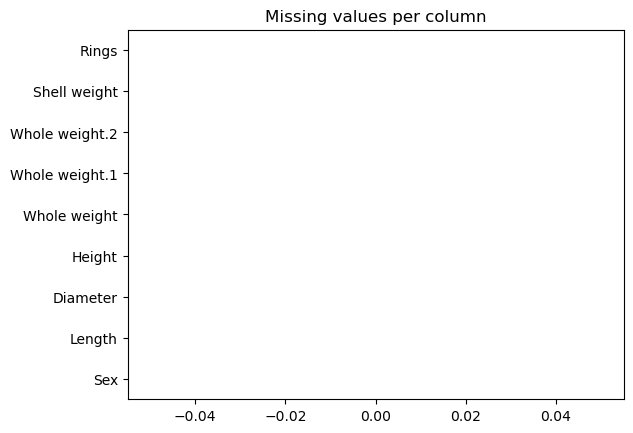

In [8]:
# Check for missing values with a horizontal bar plot
df.isnull().sum().plot(kind='barh')
plt.title('Missing values per column')
plt.show()

In [9]:
# Check for duplication
print(f'Number of duplicated records: {df.duplicated().sum()}')

Number of duplicated records: 0


## Categorical variables

In [10]:
# Select only categorical
categorical_columns = list(df.select_dtypes(include=['object']))
categorical_columns

['Sex']

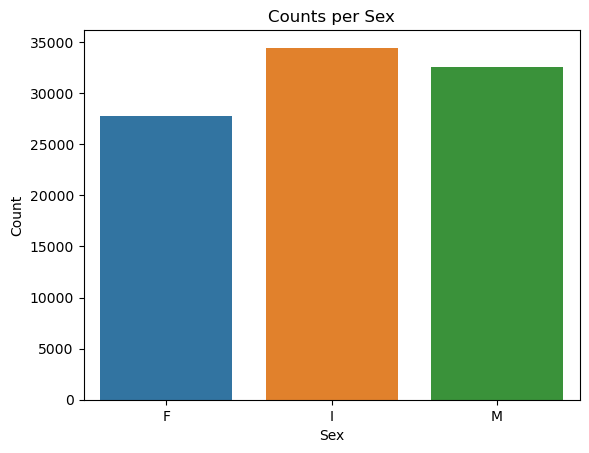

In [11]:
sns.countplot(data=df, x="Sex")
plt.title("Counts per Sex")
plt.ylabel("Count")
plt.show()

## Numerical variables

In [12]:
# Select only numerical
numerical_columns = list(df.select_dtypes(include=['float64', 'int64']))
numerical_columns

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight',
 'Rings']

In [13]:
# Check statistics
df[numerical_columns].describe().round(3)

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,94792.000,94792.000,94792.000,94792.000,94792.000,94792.000,94792.000,94792.000
mean,0.517,0.402,0.136,0.791,0.342,0.170,0.226,9.707
std,0.118,0.098,0.038,0.459,0.205,0.101,0.131,3.179
min,0.075,0.055,0.000,0.002,0.001,0.000,0.002,1.000
25%,0.445,0.345,0.110,0.420,0.178,0.086,0.120,8.000
50%,0.545,0.425,0.140,0.800,0.330,0.166,0.225,9.000
75%,0.600,0.470,0.160,1.072,0.464,0.233,0.305,11.000
max,0.815,0.650,1.130,2.826,1.488,0.760,1.005,29.000


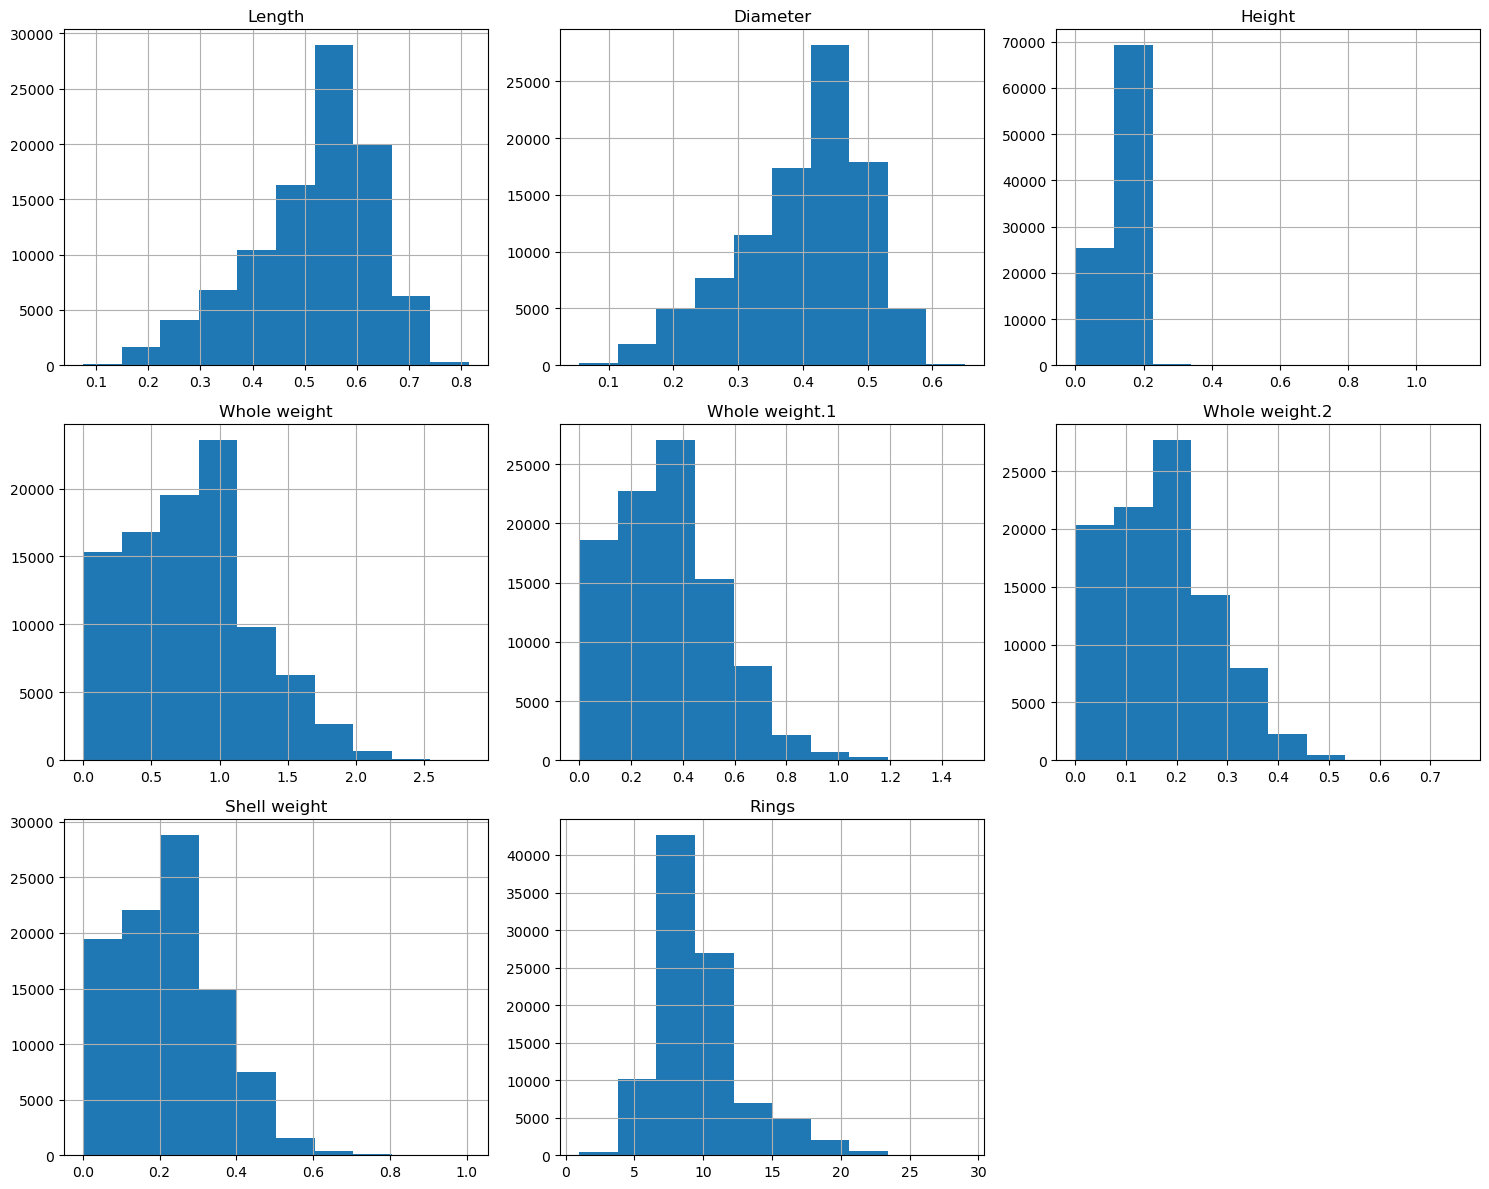

In [14]:
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

In [15]:
skew_coefficients = df[numerical_columns].skew()
skew_coefficients

Length           -0.727373
Diameter         -0.690925
Height            0.475841
Whole weight      0.436328
Whole weight.1    0.601075
Whole weight.2    0.485542
Shell weight      0.488303
Rings             1.200004
dtype: float64

## Correlation

In [16]:
# Create copy for correlation calculation
correlation_df = df.copy()

# Convert to use corr function
correlation_df.Sex = correlation_df.Sex.astype('category').cat.codes

# Create no target correlation matrix dataframe
no_target_df = correlation_df.drop('Rings', axis=1)

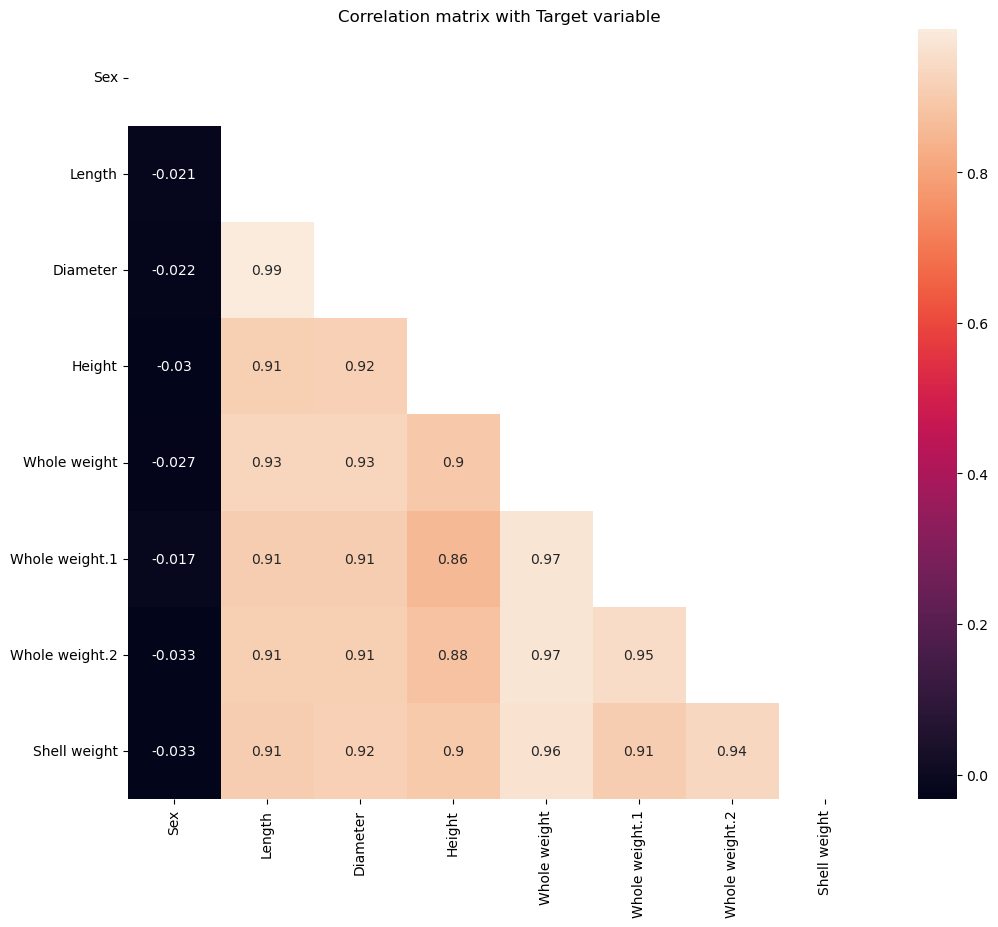

In [17]:
without_target_corr_matrix = no_target_df.corr()

# Create a mask for the upper triangle
mask_up_tri = np.triu(np.ones_like(without_target_corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(without_target_corr_matrix.round(3), annot=True, mask=mask_up_tri)
plt.title("Correlation matrix with Target variable")
plt.show()

In [18]:
# Calculate the correlation matrix with target
correlation_df.corr().abs()["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.691610
Height            0.660468
Diameter          0.634092
Length            0.620809
Whole weight      0.613666
Whole weight.2    0.584903
Whole weight.1    0.510597
Sex               0.026677
Name: Rings, dtype: float64

# Pre-processing

# Feature engineering

# Metric

# Modeling

# Evaluation

# Prediction & Submission

# Reference